Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (4664, 3, 32) 
Shape of train set: (22462, 3, 32) 
Shape of validation set: (3964, 3, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32
End of epoch 1:loss_tr=1.267, loss_val=1.285, train=46.1%, val=46.1%
End of epoch 3:loss_tr=1.059, loss_val=1.054, train=56.7%, val=56.9%
End of epoch 5:loss_tr=0.788, loss_val=0.803, train=67.4%, val=66.2%
End of epoch 7:loss_tr=0.685, loss_val=0.698, train=72.1%, val=71.3%
End of epoch 9:loss_tr=0.609, loss_val=0.643, train=75.4%, val=73.9%
End of epoch 11:loss_tr=0.546, loss_val=0.592, train=79.0%, val=76.4%
End of epoch 13:loss_tr=0.499, loss_val=0.552, train=80.8%, val=78.8%
End of epoch 15:loss_tr=0.501, loss_val=0.544, train=80.5%, val=77.9%
End of epoch 17:loss_tr=0.435, loss

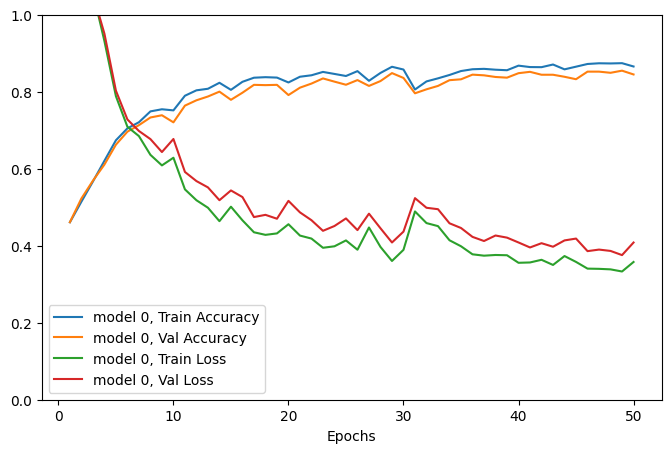

In [1]:
# Look at stardard cnn_lstm for 3 signals
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import cnn_lstm
from peratouch.config import datapath_five_users

D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.resample_random_combinations(aug_factor=1)
D.tensors_to_device()
D.print_shapes()
model = cnn_lstm(input_ch=3, n_filters_start=8, hidden_lstm=16, out_size=5) 
T = Trainer(D)
T.setup(model, learning_rate=5e-2, weight_decay=1e-3, batch_size=5000, max_epochs=50, verbose=True)
T.train_model(model)

plot_train([T])
test_accuracy([D], [model])

Train, test and validation data normalized to:
[1. 1.]
[0.99839183 1.00029337]
[1.00500158 1.00545663]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 2, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (4664, 6, 32) 
Shape of train set: (22462, 6, 32) 
Shape of validation set: (3964, 6, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32
End of epoch 1:loss_tr=1.585, loss_val=1.580, train=24.9%, val=26.3%
End of epoch 3:loss_tr=1.512, loss_val=1.499, train=31.3%, val=32.6%
End of epoch 5:loss_tr=1.505, loss_val=1.494, train=30.2%, val=30.7%
End of epoch 7:loss_tr=1.074, loss_val=1.057, train=57.3%, val=58.1%
End of epoch 9:loss_tr=0.889, loss_val=0.905, train=64.2%, val=62.9%
End of epoch 11:loss_tr=0.767, loss_val=0.759, train=68.2%, val=69.3%
End of epoch 13:loss_tr=0.677, loss_val=0.677, train=71.7%, val=72.3%
End of epoch 15:loss_tr=0.606, loss_val=0.631, train=74.9%, val=74.4%
End of epo

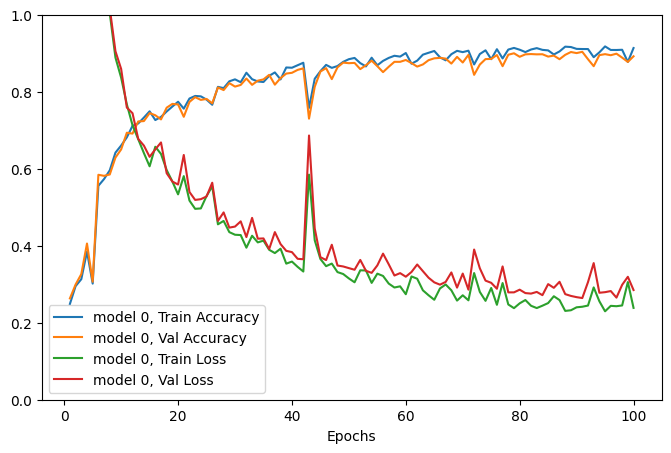

In [1]:
# Case of time-distributed cnn-lstm 
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import cnn_lstm_time_distributed
from peratouch.config import datapath_five_users

input_size = 32 
D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.resample_random_combinations(aug_factor=1)
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()
model = cnn_lstm_time_distributed(input_size=input_size, out_size=5, global_pool=False) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2000, max_epochs=100)
T.train_model(model)
plot_train([T])
test_accuracy([D], [model])